Số lượng mẫu (sample size) cũng là một yếu tố cần quan tâm vì nó ảnh hưởng tới các lỗi khác nhau của mô hình

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target
target *= 100 # rescale the target in k$

In [3]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

### Learning curve (đường cong học)
Khác với validation curve (thay đổi siêu tham số), learning curve thay đổi số lượng mẫu huấn luyện để kiểm tra mô hình cải thiện thế nào khi có thêm dữ liệu   
Mục đích của Learning Curve:
- Đánh giá lợi ích của việc thêm dữ liệu huấn luyện 
- Xác định thời điểm mà thêm dữ liệu không còn cải thiện kết quả nữa (điểm bão hòa)

### Thiết lập thí nghiệm

In [4]:
import numpy as np

train_sizes = np.linspace(0.1, 1.0, num=5, endpoint=True)
# Kích thước của tập huấn luyện sẽ lấy lần lượt là 10%, 32.5%, 55%, 77.5% và 100% của tập dữ liệu

### Dùng ShuffleSplit cho cross-validation 


In [5]:
from sklearn.model_selection import ShuffleSplit 

cv = ShuffleSplit(n_splits=30, test_size = 0.2)

### Tính toán và hiển thị Learning Curve

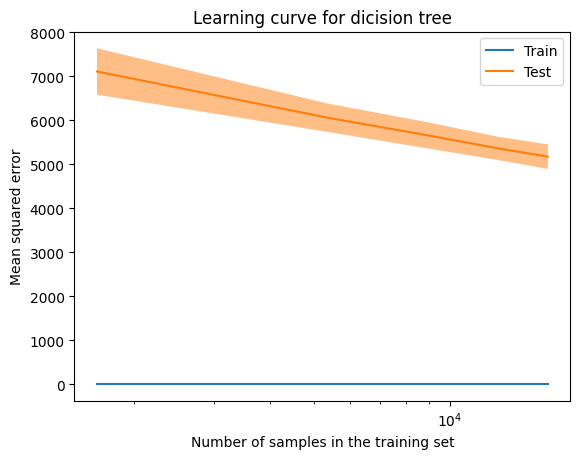

In [ ]:
from sklearn.model_selection import LearningCurveDisplay

display = LearningCurveDisplay.from_estimator(
    regressor,
    data, 
    target, 
    train_sizes=train_sizes, # có thể là tỉ lệ phần trăm dữ liệu (đang dùng) hoặc số cụ thể 
    cv=cv,
    score_type="both", # tinh ca loi huan luyen va kiem tra
    scoring='neg_mean_squared_error',
    negate_score=True, # Vi meric co 'neg_' nen can dao dau de ra ket qua duong
    n_jobs=-1, # su dung tat ca cac CPU
)

_ = display.ax_.set(xscale='log', title='Learning curve for dicision tree')

🔍 Phân tích kết quả
Lỗi huấn luyện (training error) = 0 k$ → mô hình đang overfitting (học thuộc dữ liệu huấn luyện).

Lỗi kiểm tra (testing error) giảm dần khi tăng số lượng mẫu → mô hình càng tổng quát hóa tốt hơn.

📌 Khi đường lỗi kiểm tra chạm "plateau" (điểm không còn giảm nữa):
Nếu lỗi vẫn cao:

Cần dùng mô hình phức tạp hơn để cải thiện hiệu suất.

Nếu không thể giảm thêm:

Có thể đã đạt đến Bayes error rate – mức lỗi tối thiểu lý thuyết do giới hạn của dữ liệu.

Một phần sai số là không thể tránh được nếu một số yếu tố ảnh hưởng đến giá trị mục tiêu không có trong tập đặc trưng (X) – điều này là rất phổ biến trong thực tế.

✅ Tóm tắt
Chúng ta đã học được:

Ảnh hưởng của kích thước mẫu đến sự biến động của lỗi khi thực hiện cross-validation;

Khái niệm Learning Curve – biểu diễn trực quan cho thấy mô hình có thể cải thiện bao nhiêu khi thêm dữ liệu;

Cách nhận biết khi nào nên thêm dữ liệu, hoặc khi nào nên đổi mô hình phức tạp hơn.